In [1]:
import requests
import Date
import pandas as pd
import Solar
import numpy as np
import matplotlib.pyplot as plt

In [2]:
_nasa_ = np.zeros([365,20])

for q in range(20):

    
    year = 2000+q
    url = 'https://power.larc.nasa.gov/cgi-bin/v1/DataAccess.py?request=execute&identifier=SinglePoint&parameters=T2M,PS,ALLSKY_SFC_SW_DWN&startDate='+str(year)+'0101&endDate='+str(year+1)+'0101&lat=51.747028&lon=-1.271112&userCommunity=SSE&tempAverage=DAILY&outputList=JSON,ASCII'
    # response = requests.get('https://power.larc.nasa.gov/cgi-bin/v1/DataAccess.py?request=execute&identifier=SinglePoint&parameters=T2M,PS,ALLSKY_SFC_SW_DWN&startDate=20100101&endDate=20110101&lat=51.747028&lon=-1.271112&userCommunity=SSE&tempAverage=DAILY&outputList=JSON,ASCII')
    response = requests.get(url)
    response = response.json()
    
    print(str(q))
    for n in range(365):    

        daywanted = n+1
        
        datewanted = Date.getdatewanted(daywanted, 2014)
        month, day, year = (int(x) for x in datewanted.split('/'))
        time = str(year-14+q)+str(f"{month:02d}")+str(f"{day:02d}")

        _nasa_[daywanted-1,q] = response['features'][0]['properties']['parameter']['ALLSKY_SFC_SW_DWN'][time]
        if _nasa_[daywanted-1,q] == -999:
            _nasa_[daywanted-1,q] = _nasa_[daywanted-2,q]

nasa_average = np.mean(_nasa_, axis=1)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


In [3]:
response['features'][0]['properties']['parameter']['ALLSKY_SFC_SW_DWN']#[time]

{'20190101': 0.65,
 '20190102': 0.49,
 '20190103': 0.41,
 '20190104': 0.92,
 '20190105': 0.25,
 '20190106': 0.61,
 '20190107': 0.21,
 '20190108': 1.05,
 '20190109': 0.8,
 '20190110': 0.64,
 '20190111': 0.77,
 '20190112': 0.25,
 '20190113': 0.65,
 '20190114': 0.69,
 '20190115': 0.59,
 '20190116': 0.53,
 '20190117': 1.28,
 '20190118': 0.84,
 '20190119': 0.48,
 '20190120': 1.29,
 '20190121': 0.7,
 '20190122': 1.09,
 '20190123': 1.2,
 '20190124': 0.75,
 '20190125': 0.97,
 '20190126': 0.74,
 '20190127': 0.97,
 '20190128': 1.65,
 '20190129': 1.11,
 '20190130': 1.59,
 '20190131': 1.02,
 '20190201': 0.39,
 '20190202': 1.25,
 '20190203': 1.56,
 '20190204': 0.63,
 '20190205': 0.57,
 '20190206': 1.25,
 '20190207': 1.51,
 '20190208': 0.53,
 '20190209': 1.71,
 '20190210': 1.06,
 '20190211': 1.68,
 '20190212': 1.46,
 '20190213': 1.81,
 '20190214': 2.32,
 '20190215': 2.39,
 '20190216': 0.9,
 '20190217': 1.68,
 '20190218': 0.9,
 '20190219': 2.23,
 '20190220': 1.7,
 '20190221': 2.25,
 '20190222': 2.05,

In [4]:
time

'20191231'

In [5]:
prediction = pd.read_csv('Data/solarprediction.csv')

_prediction_ = np.zeros(365)
_actual_ = np.zeros(365)


for n in range(365):    
    
    daywanted = n+1

    _prediction_[daywanted-1] = prediction['0'][daywanted-1]

    _actual_[daywanted-1] = Solar.getinsolance(daywanted).sum()[0]

[Text(0, 0, 'January'),
 Text(0, 0, 'February'),
 Text(0, 0, 'March'),
 Text(0, 0, 'April'),
 Text(0, 0, 'May'),
 Text(0, 0, 'June'),
 Text(0, 0, 'July'),
 Text(0, 0, 'August'),
 Text(0, 0, 'September'),
 Text(0, 0, 'October'),
 Text(0, 0, 'November'),
 Text(0, 0, 'December')]

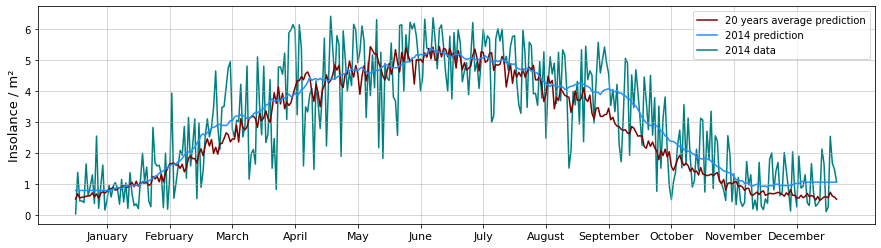

In [13]:
days = np.array([d for d in range(365)])

fig, ax = plt.subplots(figsize=[15,4])

ax.plot(days, nasa_average, color='maroon', label = '20 years average prediction', zorder=2)
ax.plot(days, _prediction_/1600, color='dodgerblue', label = '2014 prediction', zorder=3)
ax.plot(days, _actual_, color='teal', label = '2014 data', zorder=1)
ax.legend()
ax.grid(lw=0.5)
ax.set_ylabel('Insolance / m\u00B2',fontsize=13)
ax.set_xticks([d for d in range(15,365,30)])
ax.set_xticklabels(['January','February','March','April','May','June','July','August','September','October','November','December'],fontsize=11)



In [7]:
nasa_error = np.zeros(365)
predicted_error = np.zeros(365)

for n in range(365):

    nasa_error[n] = nasa_average[n]-_actual_[n]
    predicted_error[n] = _prediction_[n]/1600-_actual_[n]

In [8]:
np.absolute(nasa_error).sum()

314.5715

In [9]:
np.absolute(predicted_error).sum()

298.75426666666664

In [10]:
nasa_average.sum()

1030.8815